## 설문조사 PCA하고 통계분석 및 모형분석할꺼다.

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#파일부터 불러와보자

survey = pd.read_csv('./PCA_raw2.csv')
survey

,number,입주형태,입주기간,코로나영향,환경개선여부,정화시설,위치규모,비용,환경,인력,행정,시설,교류,인지여부,입주후매출,입주후고용,입주후절감
0,0,1,1,2,4.0,3,3,2,2,2,2,3,5,1,2,2,3
1,1,1,1,2,3.0,3,2,3,2,2,2,2,3,2,3,3,3
2,2,2,2,1,2.0,3,3,3,2,2,3,3,2,2,2,3,2
3,3,1,1,2,4.0,3,2,3,3,3,2,2,3,2,3,3,2
4,4,1,1,1,5.0,3,2,3,3,3,2,2,2,2,2,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,255,1,2,4,3.0,3,4,4,3,4,3,4,3,2,2,2,3
246,256,2,1,2,3.0,3,4,3,4,4,4,4,3,1,3,3,3
247,257,1,2,2,3.0,4,4,4,4,4,4,4,3,1,4,4,4
248,258,1,1,4,5.0,4,5,5,3,3,3,5,3,2,5,5,3


In [19]:
x = survey[['입주형태','입주기간','코로나영향','환경개선여부','정화시설','위치규모','비용','환경','인력','행정','시설','교류']]
x
y = survey[['입주후매출', '입주후고용', '입주후절감']]
y
# x = survey.drop(['입주후매출', '입주후고용', '입주후절감','유치시설1','유치시설2','유치시설3'])

,입주후매출,입주후고용,입주후절감
0,2,2,3
1,3,3,3
2,2,3,2
3,3,3,2
4,2,5,2
...,...,...,...
245,2,2,3
246,3,3,3
247,4,4,4
248,5,5,3


In [4]:
df = pd.concat([x, y], axis=1)
df.tail()

,입주형태,입주기간,코로나영향,환경개선여부,정화시설,위치규모,비용,환경,인력,행정,시설,교류,입주후매출,입주후고용,입주후절감
245,1,2,4,3.0,3,4,4,3,4,3,4,3,2,2,3
246,2,1,2,3.0,3,4,3,4,4,4,4,3,3,3,3
247,1,2,2,3.0,4,4,4,4,4,4,4,3,4,4,4
248,1,1,4,5.0,4,5,5,3,3,3,5,3,5,5,3
249,1,2,1,5.0,4,5,3,4,4,4,5,3,2,5,2


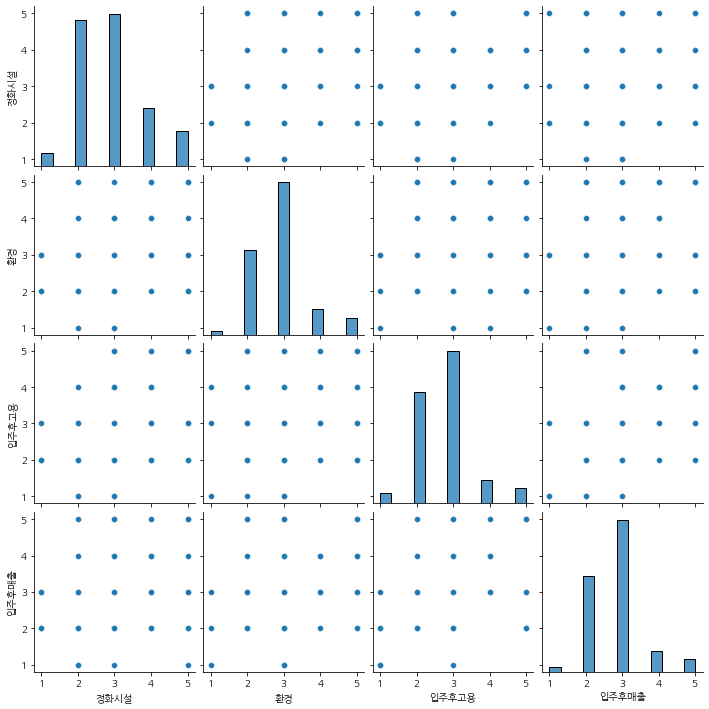

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(df[["정화시설", "환경", "입주후고용", "입주후매출"]])
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

In [20]:
from sklearn.preprocessing import StandardScaler  # 표준화 패키지 라이브러리 

x = x.values # 종속변인 추출
y = y.values # 독립변인들의 value값만 추출


x = StandardScaler().fit_transform(x) # x객체에 x를 표준화한 데이터를 저장

features = ['입주형태','입주기간','코로나영향','환경개선여부','정화시설','위치규모','비용','환경','인력','행정','시설','교류']
data = pd.DataFrame(x, columns=features)
data.head()

,입주형태,입주기간,코로나영향,환경개선여부,정화시설,위치규모,비용,환경,인력,행정,시설,교류
0,-0.635999,-0.985624,-0.233620,0.767092,0.105423,-0.196668,-1.158634,-1.08693,-1.046787,-0.982547,-0.049283,2.892295
1,-0.635999,-0.985624,-0.233620,-0.497901,0.105423,-1.059244,-0.031558,-1.08693,-1.046787,-0.982547,-0.997035,0.209276
2,1.572330,0.507746,-1.240605,-1.762894,0.105423,-0.196668,-0.031558,-1.08693,-1.046787,0.239526,-0.049283,-1.132234
3,-0.635999,-0.985624,-0.233620,0.767092,0.105423,-1.059244,-0.031558,0.13709,0.048178,-0.982547,-0.997035,0.209276
4,-0.635999,-0.985624,-1.240605,2.032085,0.105423,-1.059244,-0.031558,0.13709,0.048178,-0.982547,-0.997035,-1.132234


In [11]:
sns.pairplot(data[["정화시설", "환경", "입주후고용", "입주후매출"]])
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

KeyError: "['입주후고용', '입주후매출'] not in index"

In [66]:
#PCA 주성분 몇개가 최적인지 도출하자

from sklearn.decomposition import PCA

pca = PCA(n_components=12)
pca_array = pca.fit_transform(data)
pca_df = pd.DataFrame(pca_array, index=data.index,
                      columns=[f"pca{num+1}" for num in range(data.shape[1])])
pca_df.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,pca11,pca12
0,-0.652844,-0.396972,-1.759238,-1.922414,0.067219,-1.355217,-0.519207,1.655138,-0.748643,0.674317,-1.334607,0.025290
1,-1.960179,0.106760,-0.825260,-0.340782,-0.785756,-0.019328,-0.000237,0.673870,-1.134627,-0.117629,0.006198,0.262620
2,-1.474139,0.277088,2.388400,0.413943,-0.810364,-0.366753,0.983708,-0.289862,-0.515832,-0.358634,-0.640579,-0.522533
3,-0.811847,-0.285118,-1.291270,-0.949995,-0.501778,0.363357,0.040046,0.204449,-0.278847,0.124802,0.861532,0.777443
4,-0.922277,-1.070233,-1.113206,-1.729599,-0.989995,1.234885,0.093126,-1.039491,0.134985,-0.467596,1.032794,0.562638


In [67]:
# 주성분의 설명력과 기여율 구하기
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(data.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,3.693162,0.306532,0.306532
pca2,1.161278,0.096386,0.402919
pca3,1.085155,0.090068,0.492986
pca4,0.967175,0.080276,0.573262
pca5,0.947576,0.078649,0.651911
pca6,0.840659,0.069775,0.721685
pca7,0.727452,0.060379,0.782064
pca8,0.647428,0.053737,0.835801
pca9,0.627359,0.052071,0.887871
pca10,0.509904,0.042322,0.930193


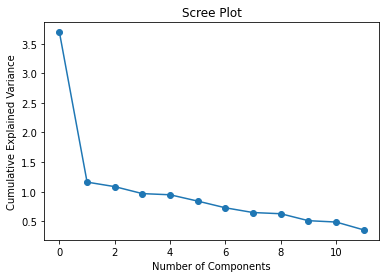

In [70]:
import matplotlib.pyplot as plt

#scree plot
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_, 'o-')

NameError: name 'finalDf' is not defined

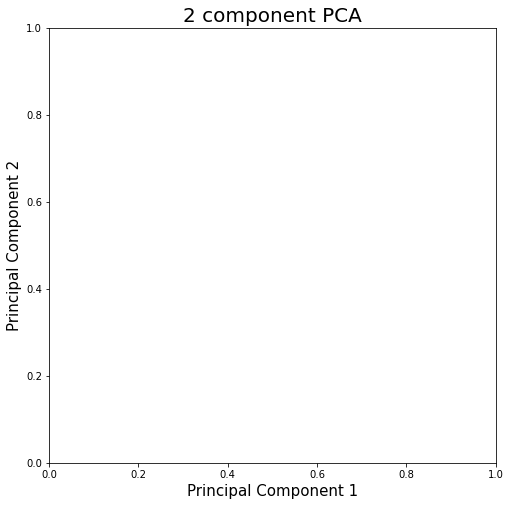

In [1]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize=20)

targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component1']
               , finalDf.loc[indicesToKeep, 'principal component2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [57]:
# PCA 실행

from sklearn.decomposition import PCA

pca = PCA(n_components=8) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [58]:
principalDf.head()

,principal component1,principal component2
0,-0.652844,-0.396972
1,-1.960179,0.106760
2,-1.474139,0.277088
3,-0.811847,-0.285118
4,-0.922277,-1.070233


In [59]:
pca.explained_variance_ratio_

array([0.30653247, 0.09638604])

In [60]:
sum(pca.explained_variance_ratio_)

0.4029185089839789